In [1]:
from math import dist
from tqdm import tqdm
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

## Visualization of data points

100 25 200


<AxesSubplot:xlabel='x', ylabel='y'>

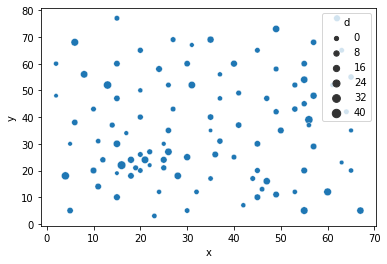

In [2]:
with open('rcdata/r103.txt', 'r', encoding = 'utf-8') as f:
    [f.readline() for i in range(4)]
    n_locations = 100
    n_vehicles, cap = [int(x) for x in f.readline().split()]
    data = []
    [f.readline() for i in range(4)]
    for i in range(n_locations + 1):
        data.append([float(x) for x in f.readline().split()[1:]])

data = np.array(data)
print(n_locations, n_vehicles, cap)
dataT = data.T
a = pd.DataFrame({'x':dataT[0], 'y':dataT[1] , 'd':dataT[2]})
sns.scatterplot(data=a, x='x', y='y', size='d', palette="deep")

In [3]:
data

array([[ 35.,  35.,   0.,   0., 230.,   0.],
       [ 41.,  49.,  10.,   0., 204.,  10.],
       [ 35.,  17.,   7.,   0., 202.,  10.],
       [ 55.,  45.,  13.,   0., 197.,  10.],
       [ 55.,  20.,  19., 149., 159.,  10.],
       [ 15.,  30.,  26.,   0., 199.,  10.],
       [ 25.,  30.,   3.,  99., 109.,  10.],
       [ 20.,  50.,   5.,   0., 198.,  10.],
       [ 10.,  43.,   9.,  95., 105.,  10.],
       [ 55.,  60.,  16.,  97., 107.,  10.],
       [ 30.,  60.,  16., 124., 134.,  10.],
       [ 20.,  65.,  12.,  67.,  77.,  10.],
       [ 50.,  35.,  19.,   0., 205.,  10.],
       [ 30.,  25.,  23., 159., 169.,  10.],
       [ 15.,  10.,  20.,   0., 187.,  10.],
       [ 30.,   5.,   8.,  61.,  71.,  10.],
       [ 10.,  20.,  19.,   0., 190.,  10.],
       [  5.,  30.,   2., 157., 167.,  10.],
       [ 20.,  40.,  12.,   0., 204.,  10.],
       [ 15.,  60.,  17.,   0., 187.,  10.],
       [ 45.,  65.,   9.,   0., 188.,  10.],
       [ 45.,  20.,  11.,   0., 201.,  10.],
       [ 4

In [13]:
tour = [0,60,45,83,5,99,6,0,71,65,78,34,35,81,77,28,0,2,22,75,56,4,25,54,0,7,19,11,8,46,47,48,82,18,89,0,94,96,95,97,87,13,0,27,69,30,9,66,20,51,1,0,42,43,15,57,41,74,72,73,21,58,0,40,53,12,68,80,0,50,33,76,79,10,31,0,36,64,49,63,90,32,70,0,92,98,14,44,38,86,16,61,85,91,100,37,0,26,39,23,67,55,24,29,3,0,52,62,88,84,17,93,59,0]

In [16]:
dist_tour, cap = 0, 0
time_tour, max_cap = 0, 200
for i in range(len(tour)-1):
    ni, nj = tour[i], tour[i+1]
    tij = dist([data[ni,0], data[ni,1]], [data[nj,0], data[nj,1]])
    dist_tour += tij
    if nj == 0:
        time_tour, cap = 0, 0
    else:
        cap += data[nj,2]
        time_tour = max(time_tour + tij, data[nj,3])
        assert(data[nj,3] <= time_tour <= data[nj,4])
        assert(cap <= max_cap)
        time_tour += data[nj,5]
print(dist_tour)

1292.6755102213547


## Creating a graph

In [6]:
class Graph:
    def __init__(self, x, y) -> None:
        self.n = n = len(x)
        self.x = np.array(x, dtype=float)
        self.y = np.array(y, dtype=float)
        self.edges = np.zeros(shape=(n,n), dtype=float)

        for i in range(self.n):
            for j in range(self.n):
                self.edges[i,j] = dist([x[i], y[i]], [x[j], y[j]])

        xf = np.average(self.edges)
        for i in range(self.n):
            self.edges[i,i] = xf

In [7]:
graph = Graph(dataT[1], dataT[2])
graph.edges[0]

array([31.6307078 , 40.31128874, 39.05124838, 36.40054945, 50.        ,
       40.31128874, 32.01562119, 32.01562119, 31.6227766 , 25.        ,
       31.6227766 , 41.23105626, 20.61552813, 18.02775638, 11.18033989,
       22.36067977, 22.36067977, 20.61552813, 49.24428901, 56.56854249,
       36.40054945, 46.09772229, 53.15072906, 54.08326913, 36.40054945,
       49.24428901, 36.05551275, 25.        , 22.36067977, 18.02775638,
       22.36067977, 25.        , 22.36067977, 26.92582404, 33.54101966,
       40.31128874, 53.15072906, 33.52610923, 42.42640687, 31.6227766 ,
       46.09772229, 32.01562119, 31.6227766 , 40.31128874, 33.52610923,
       33.52610923, 31.6227766 , 11.18033989, 46.09772229, 39.29376541,
       33.54101966, 35.51056181, 20.22374842,  5.        , 18.86796226,
       18.86796226, 24.20743687, 33.9705755 , 44.72135955, 35.51056181,
       19.72308292, 17.49285568, 15.29705854, 30.59411708, 26.2488095 ,
       18.86796226, 20.61552813, 12.04159458, 23.2594067 , 27.07

## Make a set of plots for visualization before and after optimization

In [8]:
def split_lists(lst):
    lst = ' '.join(str(x) for x in lst).split(' 0 ')
    llst = []
    for x in lst:
        go = x.split(' ')
        go = [int(x) for x in go]
        if go[0] != 0:
            go.insert(0,0)
        if go[-1] != 0:
            go.insert(len(go),0)
        llst.append(go)
    return llst

In [9]:
def make_plots(costs, tour, graph):
  fig, ax =  plt.subplots(1, 2, figsize=(11, 5))

  # second plot, for cost vs iteration
  ax[0].set_ylabel('Value of best_ant.cost')
  ax[0].set_xlabel('Iteration #')
  ax[0].plot(costs)

  # third plot, for tour after optimization
  for tour in split_lists(tour):
    plot_x = []
    plot_y = []
    for i in tour:
        plot_x.append(graph.x[i])
        plot_y.append(graph.y[i])

    ax[1].set_ylabel('Y')
    ax[1].set_xlabel('X')
    ax[1].plot(plot_x, plot_y, marker='o', linestyle='dashed')

## Defining the objective funtion

In [10]:
def objective(tour, graph):
    fitn = 0
    n = len(tour)
    for i in range(n-1):
        fitn += graph.edges[tour[i], tour[i+1]]
    return fitn

## Creating the colony

In [11]:
class Ant:
    def __init__(self) -> None:
        self.tour = []
        self.cost = np.inf

    def __repr__(self) -> str:
        return f'Ant(tour={self.tour}, o={self.cost})'

    def __lt__(self, other):
        return self.cost < other.cost

class Colony:
    def __init__(self, graph, n_ants, tau, eta, alpha, beta, veh) -> None:
        self.n_vertex = n = graph.n
        self.n_ants = n_ants
        self.ants = [Ant() for i in range(n_ants)]

        for i in range(n_ants):
            self.ants[i].tour.append(0)
            for j in range(2, n + veh):
                last = self.ants[i].tour[-1]
                probs = (tau[last] ** alpha) * (eta[last] ** beta)                
                probs[0] = np.average(probs)
                probs[probs <= 0.00001] = 0.00001

                to_set = np.array(self.ants[i].tour)
                if np.count_nonzero(to_set == 0) == veh:
                    probs[to_set] = 0
                else:
                    to_set = np.delete(to_set, np.argwhere(to_set == 0))
                    probs[to_set] = 0

                # print(probs)
                probs = probs / np.sum(probs)
                self.ants[i].tour.append(np.random.choice(n, p=probs))
            self.ants[i].tour.append(0)

        for i in range(n_ants):
            self.ants[i].cost = objective(self.ants[i].tour, graph)

        self.queen = copy.deepcopy(min(self.ants))

## Function to update pheromones

In [12]:
def update_pheromones(colony, tau):
    n_ants = colony.n_ants
    n_vertex = colony.n_vertex

    for i in range(n_ants):
        for j in range(n_vertex - 1):
            cur, nxt = colony.ants[i].tour[j:j+2]
            tau[cur][nxt] += 1/colony.ants[i].cost
            tau[nxt][cur] += 1/colony.ants[i].cost

## Function to implement ACO

In [13]:
def run_ACO(n_ants, max_iter, graph, tau, eta, rho, alpha, beta, veh):

    best_ant = Ant()
    costs = []
    # taus = []

    for t in tqdm(range(max_iter)):
        # if t % 10 == 0:
        #     taus.append(np.max(tau, axis=1))
        colony = Colony(graph, n_ants, tau, eta, alpha, beta, veh)
        
        if colony.queen.cost < best_ant.cost:
            best_ant.tour = colony.queen.tour.copy()
            best_ant.cost = colony.queen.cost

        update_pheromones(colony, tau)
        tau = (1-rho) * tau

        costs.append(best_ant.cost)
    # sns.heatmap(taus)
    return best_ant, costs

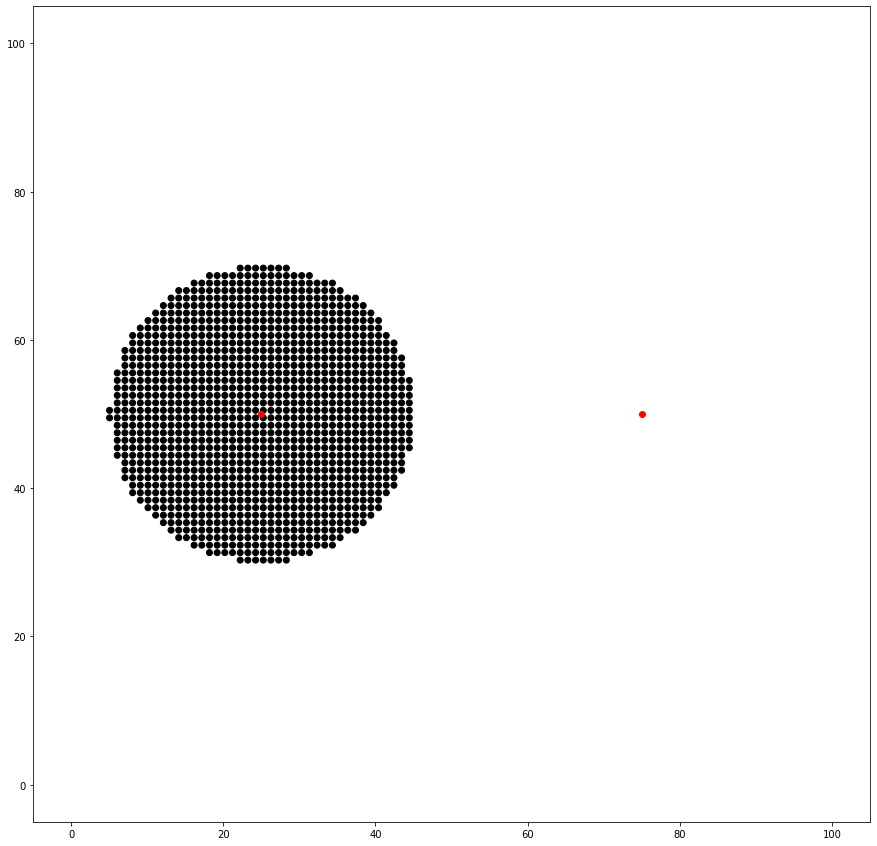

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp

x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)

xl = []
yl = []
zl = []
a = [25,50]
b = [75,50]
for i in x:
    for j in y:
        xl.append(i)
        yl.append(j)
        if dist([i,j],a) < 20:
            # z = 1 / ((2 - dist([i,j],a)) * dist([i,j],b))
            z = dist([i,j],a) + dist([i,j],b)
        else:
            z = 1
        zl.append(z)

s = sum(zl)
zl = np.array(zl)
zl = 1/(1 + np.exp(-zl))
        
cm = plt.cm.get_cmap('binary')
plt.figure(figsize=(15, 15))
plt.scatter(xl,yl,c=zl,cmap=cm)
plt.plot(a[0],a[1],'ro')
plt.plot(b[0],b[1],'ro')

<AxesSubplot:>

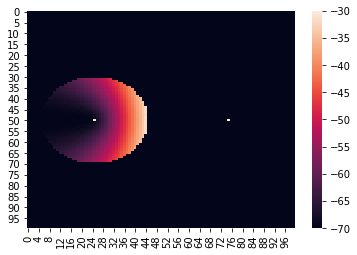

In [82]:
data = np.random.rand(100,100)
for i in range(100):
    for j in range(100):
        d = dist([i,j],[50,25])
        data[i][j] = - (20 - d + dist([i,j],[50,75])) if d < 20 else -70

data[50][25] = -30
data[50][75] = -30
sns.heatmap(data)